In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def utility(A, sigma_A, sigma_N, r):
    return A*sigma_N**2 / sigma_A**2 - r * sigma_N

def sigma0(sigma_A, A, r):
    return (sigma_A**2 / A)*r

Measured mean and standard deviation of colony areas and numbers of colonies for high and low density:

In [53]:
AL = 2.38e5
AH = 5.6e5
sigmaAL = 1.19e5
sigmaAH = 2.32e5
sigmaN = np.arange(0,6e5,100)
NL = 13.36
NH = 5.83

Carrying capacity $K = AN$, for each dilution, $K$ is about the same:

In [54]:
AL * NL

3179680.0

In [55]:
AH * NH

3264800.0

The utility of growth of $N$ cells to the biofilm as a whole is:

\begin{equation}
    u = \mathbb{E}(R) - r \sqrt{N} \sigma_A
\end{equation}

where $\mathbb{E}(R) = K$ is the expected payoff/return, and $r$ is the price of risk.

If colonies act in the interests of the whole biofilm, then growth will occur when the utility $u \ge 0$. There is therefore a critical number of cells $N$ such that growth will occur. This is given by:

\begin{equation}
    K - r \sqrt{N_0} \sigma_A = 0
\end{equation}

\begin{equation}
    N_0 = \left(\frac{K}{r \sigma_A}\right)^2
\end{equation}

Thus $N_0$ depends on the biofilm price of risk (risk preference). Plot this relation:

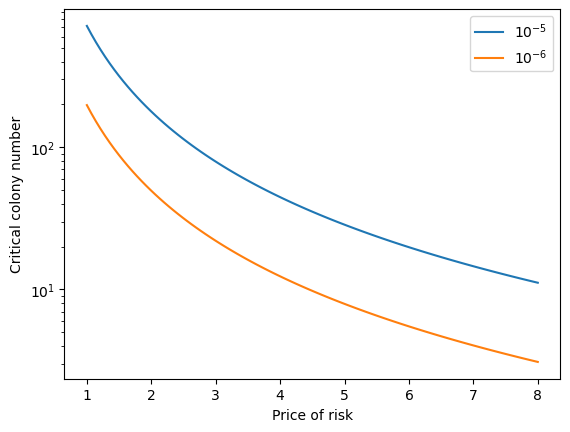

In [56]:
r = np.linspace(1, 8, 100)
N0L = (AL * NL / r / sigmaAL)**2
N0H = (AH * NH / r / sigmaAH)**2
plt.plot(r, N0L)
plt.plot(r, N0H)
plt.legend(['$10^{-5}$', '$10^{-6}$'])
plt.xlabel('Price of risk')
plt.ylabel('Critical colony number')
plt.yscale('log')

The price of risk inferred by the growth decision in each dilution is given by:

\begin{equation}
    r = \frac{K}{\sqrt{N}\sigma_A}
\end{equation}

In [57]:
rL = AL * np.sqrt(NL) / sigmaAL # note K = AN
rH = AH * np.sqrt(NH) / sigmaAH # note K = AN
rL,rH

(7.310266752998826, 5.82819829472741)

The price of risk is approximately the same in each dilution. Plotting the inferred price of risk on the graph:

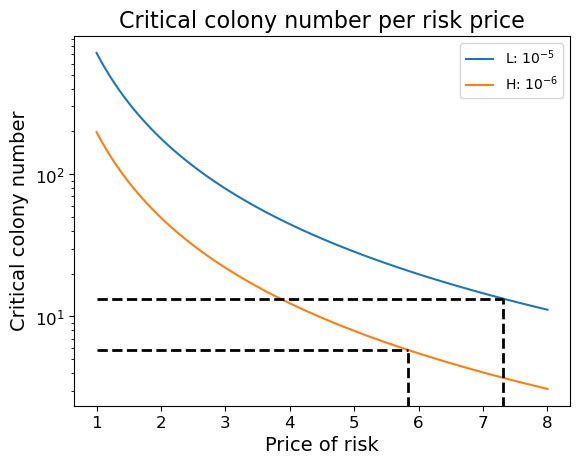

In [59]:
plt.plot(r, N0L)
plt.plot(r, N0H)
plt.hlines([NL,NH], [1,1], [rL,rH], 'k', linestyles='dashed', linewidth=2)
plt.vlines([rL,rH], [0,0], [NL,NH], 'k', linestyles='dashed', linewidth=2)
plt.legend(['L: $10^{-5}$', 'H: $10^{-6}$'], fontsize=10)
plt.xlabel('Price of risk', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Critical colony number', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Critical colony number per risk price', fontsize=16)
plt.yscale('log')
plt.savefig('colonynumber_vs_pricerisk.png',dpi=300)
plt.show()

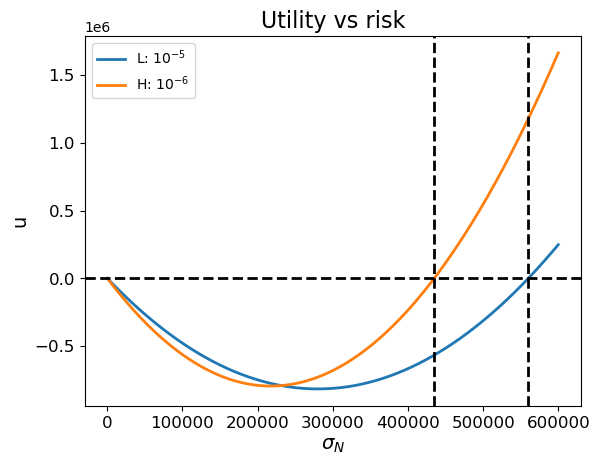

In [60]:
plt.plot(sigmaN,utility(AH, sigmaAH,sigmaN,rH),label='L: $10^{-5}$', linewidth=2)
plt.plot(sigmaN,utility(AL, sigmaAL,sigmaN,rL),label='H: $10^{-6}$', linewidth=2)
sigma0H = sigma0(sigmaAH, AH, rH)
sigma0L = sigma0(sigmaAL, AL, rL)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.axvline(x=sigma0H, color='black', linestyle='--', linewidth=2)
plt.axvline(x=sigma0L, color='black', linestyle='--', linewidth=2)
plt.xlabel('$\sigma_N$', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('u', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Utility vs risk', fontsize=16)
plt.legend(fontsize=10)
plt.savefig('utility_vs_risk.png',dpi=300)
plt.show()